# Wikipedia Notable Life Expectancies
## [Notebook 10: Exploratory Data Analysis](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_EDA_thanak_2022_09_30.ipynb)
### Context

The
### Objective

The
### Data Dictionary
- **day**: Reported day of month of death
- **name**: Name of individual
- **info**: Original Wikipedia information fields for the individual from Wikipedia Notable Deaths' List page ("age, country of citizenship at birth, subsequent country of citizenship (if applicable), reason for notability, and cause of death (if known)"
- **link**: Link to the individual's page
- **num_references**: Number of references on the individual's page (a proxy for notability)
- **year**: Reported year of death
- **month**: Reported month of death
- **info_parenth**: Additional information for individual that was extracted from info because it was in parentheses
- **age**: Reported age in integer years at death*
- **cause_of_death**: Reported cause of death
- **place_1**: Country of citizenship at birth
- **place_2**: Subsequent country of citizenship (if applicable)
- **known for categories**: 0 (No) or 1 (Yes) value if individual's reported known-for role(s) is within the category. Mutliple categories are possible.† 
        - sciences
        - social
        - spiritual
        - academia_humanities
        - business_farming
        - arts
        - sports
        - law_enf_military_operator 
        - politics_govt_law
        - crime
        - event_record_other
        - other_species
- **num_categories**: Total **num_categories** for individual

    \* For age reported in a two-value estimated range, **age** reflects the arithmetic mean.  Reported estimated values of a single number reflect that number, while estimates covering a decade (e.g., 80's) were converted to the middle of the decade (i.e., 85).  The vast majority of entries for **age** reflect the single integer value that was reported.  
    
    † See Appendix A for further category definitions and decision-making regarding role categorization.

### Importing Libraries

In [1]:
# To structure code automatically
%load_ext nb_black

# To import/export sqlite databases
import sqlite3 as sql

# To save/open python objects in pickle file
# import pickle

# To help with reading, cleaning, and manipulating data
import pandas as pd
import numpy as np

# import re

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
# To define the maximum number of rows to be displayed in a dataframe
pd.set_option("display.max_rows", 211)

# To set some dataframe visualization attributes
pd.set_option("max_colwidth", 150)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
# import warnings

# warnings.filterwarnings("ignore")

# To set some plot visualization attributes
sns.set_theme()
sns.set_palette(
    (
        "midnightblue",
        "goldenrod",
        "maroon",
        "darkolivegreen",
        "cadetblue",
        "tab:purple",
        "yellowgreen",
    )
)
plt.rc("font", size=12)
plt.rc("axes", titlesize=15)
plt.rc("axes", labelsize=14)
plt.rc("xtick", labelsize=13)
plt.rc("ytick", labelsize=13)
plt.rc("legend", fontsize=13)
plt.rc("legend", fontsize=14)
plt.rc("figure", titlesize=16)

# To play auditory cue when cell has executed, has warning, or has error and set chime theme
import chime

chime.theme("zelda")

<IPython.core.display.Javascript object>

## Data Overview

### [Reading](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_clean8.db), Sampling, and Checking Data Shape

In [2]:
# Reading the dataset
conn = sql.connect("wp_life_expect_clean8.db")
data = pd.read_sql("SELECT * FROM wp_life_expect_clean8", conn)

# Making a working copy
df = data.copy()

# Checking the shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

# Checking first 2 rows of the data
df.head(2)

There are 98038 rows and 25 columns.


,day,name,info,link,num_references,year,month,info_parenth,age,cause_of_death,place_1,place_2,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,other_species,num_categories
0,1,William Chappell,", 86, British dancer, ballet designer and director.",https://en.wikipedia.org/wiki/William_Chappell_(dancer),21,1994,January,None,86.000,None,United Kingdom of Great Britain and Northern Ireland,None,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,Raymond Crotty,", 68, Irish economist, writer, and academic.",https://en.wikipedia.org/wiki/Raymond_Crotty,12,1994,January,None,68.000,None,Ireland,None,0,0,0,1,0,1,0,0,1,0,0,0,3


<IPython.core.display.Javascript object>

In [3]:
# Checking last 2 rows of the data
df.tail(2)

,day,name,info,link,num_references,year,month,info_parenth,age,cause_of_death,place_1,place_2,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,other_species,num_categories
98036,9,Aamir Liaquat Hussain,", 50, Pakistani journalist and politician, MNA .",https://en.wikipedia.org/wiki/Aamir_Liaquat_Hussain,99,2022,June,"2002 2007, since 2018",50.000,None,Pakistan,None,0,0,0,0,0,1,0,0,1,0,0,0,2
98037,9,Zou Jing,", 86, Chinese engineer, member of the Chinese Academy of Engineering.",https://en.wikipedia.org/wiki/Zou_Jing_(engineer),3,2022,June,None,86.000,None,"China, People's Republic of",None,1,0,0,0,0,0,0,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [4]:
# Checking a sample of the data
df.sample(5)

,day,name,info,link,num_references,year,month,info_parenth,age,cause_of_death,place_1,place_2,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,other_species,num_categories
46969,24,Anna Reynolds,", 82, English opera singer.",https://en.wikipedia.org/wiki/Anna_Reynolds_(singer),5,2014,February,None,82.000,None,United Kingdom of Great Britain and Northern Ireland,None,0,0,0,0,0,1,0,0,0,0,0,0,1
97885,29,Antônio Augusto Cançado Trindade,", 74, Brazilian jurist, judge of the International Court of Justice .",https://en.wikipedia.org/wiki/Ant%C3%B4nio_Augusto_Can%C3%A7ado_Trindade,4,2022,May,since 2009,74.000,None,Brazil,None,0,0,0,0,0,0,0,0,1,0,0,0,1
13439,16,Donald Hume,", 86, American Olympic rower (.",https://en.wikipedia.org/wiki/Donald_Hume_(rower),4,2001,September,gold medal winner in men rowing eight at the 1936 Summer Olympics,86.000,None,United States of America,None,0,0,0,0,0,0,1,0,0,0,0,0,1
86552,7,Neil Sheehan,", 84, American journalist , complications from Parkinson's disease.",https://en.wikipedia.org/wiki/Neil_Sheehan,23,2021,January,"Pulitzer Prize, winner 1989",84.000,complications from Parkinson disease,United States of America,None,0,0,0,0,0,1,0,0,0,0,0,0,1
802,5,Charles Comfort,", 93, Scottish-Canadian painter, sculptor, and writer.",https://en.wikipedia.org/wiki/Charles_Comfort,13,1994,July,None,93.000,None,Scotland,Canada,0,0,0,0,0,1,0,0,0,0,0,0,1


<IPython.core.display.Javascript object>

### Checking data types, duplicates, and null values

In [5]:
# Checking data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98038 entries, 0 to 98037
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   day                        98038 non-null  object 
 1   name                       98038 non-null  object 
 2   info                       98038 non-null  object 
 3   link                       98038 non-null  object 
 4   num_references             98038 non-null  int64  
 5   year                       98038 non-null  int64  
 6   month                      98038 non-null  object 
 7   info_parenth               36659 non-null  object 
 8   age                        98038 non-null  float64
 9   cause_of_death             33490 non-null  object 
 10  place_1                    97885 non-null  object 
 11  place_2                    6619 non-null   object 
 12  sciences                   98038 non-null  int64  
 13  social                     98038 non-null  int

<IPython.core.display.Javascript object>

In [6]:
# Checking duplicate rows
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [7]:
# Checking for duplicate links
df["link"].duplicated().sum()

0

<IPython.core.display.Javascript object>

In [8]:
# Checking sum of null values by column
df.isnull().sum()

day                              0
name                             0
info                             0
link                             0
num_references                   0
year                             0
month                            0
info_parenth                 61379
age                              0
cause_of_death               64548
place_1                        153
place_2                      91419
sciences                         0
social                           0
spiritual                        0
academia_humanities              0
business_farming                 0
arts                             0
sports                           0
law_enf_military_operator        0
politics_govt_law                0
crime                            0
event_record_other               0
other_species                    0
num_categories                   0
dtype: int64

<IPython.core.display.Javascript object>

In [9]:
# Check percentage of null values by column
df.isnull().sum() / len(df) * 100

day                          0.000
name                         0.000
info                         0.000
link                         0.000
num_references               0.000
year                         0.000
month                        0.000
info_parenth                62.607
age                          0.000
cause_of_death              65.840
place_1                      0.156
place_2                     93.249
sciences                     0.000
social                       0.000
spiritual                    0.000
academia_humanities          0.000
business_farming             0.000
arts                         0.000
sports                       0.000
law_enf_military_operator    0.000
politics_govt_law            0.000
crime                        0.000
event_record_other           0.000
other_species                0.000
num_categories               0.000
dtype: float64

<IPython.core.display.Javascript object>

In [10]:
# Checking number of missing values per row
df.isnull().sum(axis=1).value_counts()

2    42651
3    38637
1    15946
0      719
4       85
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- We have 98,038 rows and 25 columns.
- Our target, `age` has no missing values.  
- As expected, `info_parenth` and `place_2` both have high percentages of missing values.  `cause_of death` also has a very high proportion of missing values, which is not problematic for the current analysis.
- There are 153 missing values (~1.6%) for `place_1`, the handling of which we will need to consider.
- The value counts for missing values per row looks generally consistent with the expected missing values, with the `place_1` missing values being the only concern.
- Since we do not have a date of birth feature, we are not working with age calculated to the day, so we can drop `day`.
- There are no duplicate `link` values in the current dataset, so we can drop the purely nominal `name` column as we are retaining `link`, which we may need for referencing specific entries.
- `num_references`, `year`, `age`, and `num_categories` are all of the appopriate numeric type, either integer or float.
- `month` may be interesting for EDA, but is not anticipated to be useful as a predictor as we do not have date of birth.  We will retain it for now and typecast it from object to category.
- `info`, `link`, `info_parenth`, and `cause_of_death` will be left as object type.  `cause_of_death` is not a focus of this analysis, but this column could be further treated to create broader categories of causes (e.g., grouping all types of cancer) for further analysis.  For now, we will retain it, as we might probe it somewhat during EDA.  `info` and `info_parenth` we will retain for reference only.
- `place_1` and `place_2` are of object type and we will convert them to category.  After initial EDA, we will extract a new feature, `region`, to reduce dimensionality of the `place_` information.
- The `known for` categories are all of integer type, but are boolean in nature.  For EDA, we will typecast them as category, then convert them back to integer for modeling.
- For this analysis, we are interested only in human entries, so we will proceed to drop non-human entries, as well as the `other_species` column, which will contain only zeros for the human entries.

#### Dropping `day` and `name`

In [11]:
# Dropping day and name columns
df.drop(["day", "name"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

#### Excluding Entries for `other_species`

In [12]:
# Re-assigning df to include only human entries
df = df[df["other_species"] == 0]

# Dropping other_species column as no longer needed
df.drop("other_species", axis=1, inplace=True)

# Checking new shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 97549 rows and 22 columns.


<IPython.core.display.Javascript object>

#### Typecasting `place_1`,  `place_2`, and `known for` Categories as Category

In [13]:
# Typecasting place_1 and place_2 as category
df[
    [
        "place_1",
        "place_2",
        "sciences",
        "social",
        "spiritual",
        "academia_humanities",
        "business_farming",
        "arts",
        "sports",
        "law_enf_military_operator",
        "politics_govt_law",
        "crime",
        "event_record_other",
    ]
] = df[
    [
        "place_1",
        "place_2",
        "sciences",
        "social",
        "spiritual",
        "academia_humanities",
        "business_farming",
        "arts",
        "sports",
        "law_enf_military_operator",
        "politics_govt_law",
        "crime",
        "event_record_other",
    ]
].astype(
    "category"
)

<IPython.core.display.Javascript object>

#### Confirming Updated Data Types and Number of Columns

In [14]:
# Confirming data types and number of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97549 entries, 0 to 98037
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   info                       97549 non-null  object  
 1   link                       97549 non-null  object  
 2   num_references             97549 non-null  int64   
 3   year                       97549 non-null  int64   
 4   month                      97549 non-null  object  
 5   info_parenth               36536 non-null  object  
 6   age                        97549 non-null  float64 
 7   cause_of_death             33179 non-null  object  
 8   place_1                    97408 non-null  category
 9   place_2                    6565 non-null   category
 10  sciences                   97549 non-null  category
 11  social                     97549 non-null  category
 12  spiritual                  97549 non-null  category
 13  academia_humanities        9754

<IPython.core.display.Javascript object>

#### Observations:
- With 97549 human entries and 22 remaining columns, we are read to proceed with EDA.

## Exploratory Data Analysis (EDA)

### Summary Statistics of Numerical Features

In [15]:
# Summary statistics of numerica features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_references,97549.000,12.671,21.391,3.000,4.000,7.000,13.000,660.000
year,97549.000,2012.143,7.828,1994.000,2007.000,2014.000,2019.000,2022.000
age,97549.000,76.766,16.088,0.250,69.000,80.000,88.000,134.000
num_categories,97549.000,1.159,0.400,1.000,1.000,1.000,1.000,5.000


<IPython.core.display.Javascript object>

#### Observations:
- Our target, `age`, has a left-skewed distribution with a wide spread, from 3 months to 134 years.  Despite the upper-end outlier, the mean and median are close, at ~76 and 80 years, respectively.
- `num_references` has a wide spread and is highly right skewed, with a mean of ~13 and median of 7.
- We see the range of `year` correctly reflects the data that was collected, from 1994 to 2022.
- `num_categories` ranges from 1 to 5, with at least 75% of entries having only 1 `known for` category.

### Summary Statistics of Categorical and Object Features

In [16]:
# Summary statistics of non-numerical features
df.describe(include=["object", "category"]).T

,count,unique,top,freq
info,97549,89447,", 87, American baseball player .",41
link,97549,97549,https://en.wikipedia.org/wiki/William_Chappell_(dancer),1
month,97549,12,January,9868
info_parenth,36536,16946,", ,",3120
cause_of_death,33179,3163,cancer,4220
place_1,97408,211,United States of America,34843
place_2,6565,155,United States of America,2317
sciences,97549,2,0,88794
social,97549,2,0,96696
spiritual,97549,2,0,94101


<IPython.core.display.Javascript object>

In [17]:
# Checking different levels of place_1 and place_2
cat_cols = ["place_1", "place_2"]
for column in cat_cols:
    print(f"Unique values in {column} are: \n")
    print(df[column].value_counts(), "\n", "-" * 60, "\n")

Unique values in place_1 are: 

United States of America                                34843
United Kingdom of Great Britain and Northern Ireland    12186
India                                                    3857
Canada                                                   3572
Australia                                                2930
France                                                   2420
Germany                                                  2389
Italy                                                    1862
Russia                                                   1406
New Zealand                                              1243
Ireland                                                  1180
Japan                                                    1165
China, People's Republic of                              1135
Scotland                                                 1093
Spain                                                    1043
Norway                                

<IPython.core.display.Javascript object>

#### Observations
- `info` stands out as having a value consistent for 41 entries--American baseball player, living to age 87.  This feature is retained only for reference, as untreated it is unwieldy, but the example does provide validation to the entries having identifiable similarities and differences, on which to base analysis.
- `link` is again confirmed here as having all unique values.
- We see that there are 12 unique values for `month` as expected.
- `cause_of_death` has 3230 unique values, in its current form, with 4226 entries for the top value of unspecified cancer.
- There are 211 unique values for `place_1` and 155 for `place_2`, with United States of America being the most frequent for both and we can see the unique places with their respective counts listed.
- `arts` leads the `known for` categories, followed by `politics_govt_law`, then `sports`.  All categories have 2 values, as expected.

### Univariate Analysis

#### Function to plot histogram and boxplot on same scale

In [18]:
# Define a function to create a boxplot and histplot for numeric variables
def hist_box(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined
    
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12, 7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f1, (ax_box1, ax_hist1) = plt.subplots(  # Assigning the figure and the 2 axes
        nrows=2,  # Subplot grid has 2 rows
        sharex=True,  # Subplots share the same x axis
        gridspec_kw={
            "height_ratios": (0.25, 0.75)
        },  # Proportional height of the subplots
        figsize=figsize,
    )  # Assigning the figure size

    # Creating the boxplot and showing mean with some mean and median attributes
    sns.boxplot(
        data=data,
        x=feature,
        ax=ax_box1,
        showmeans=True,
        color="mediumorchid",
        medianprops={"color": "black"},
        meanprops={
            "marker": "D",
            "markersize": 4,
            "markeredgecolor": "black",
            "markerfacecolor": "black",
        },
    )

    # Creating the histplot
    sns.histplot(
        data=data, x=feature, ax=ax_hist1, kde=kde, bins=bins, color="darkolivegreen"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist1, color="darkolivegreen"
    )

    # Draw vertical line at mean on histogram
    ax_hist1.axvline(data[feature].mean(), linestyle="--", linewidth=2, color="black")

    # Draw vertical line at median on histogram
    ax_hist1.axvline(data[feature].median(), linewidth=2, color="black")

<IPython.core.display.Javascript object>

#### Function to visualize distribution without extreme outliers, defined by given thresholds, and view the extreme outlier rows

In [19]:
# Calls hist_box function and displays skewness and number of extreme values, defined by thresholds.
# Returns dataframe of rows containing the extreme values
def custom_thresh(data, feature, min_threshold=-np.inf, max_threshold=np.inf):
    """
    Displays histogram and boxplot on same scale with skewness, and number of extreme outliers, defined by thresholds.
    Returns dataframe of rows containing extreme values
    
    data: dataframe
    feature: numerical column
    min_threshold: cutoff value at or below which values are considered extreme outliers (default -np.inf)
    max_threshold: cutoff value at or above which values are considered extreme outliers (default np.inf)
    """
    constraint = (data[feature] >= min_threshold) & (
        data[feature] <= max_threshold
    )  # Define plot constraints
    hist_box(
        data[constraint], feature,
    )  # Visualize distribution without extreme outliers

    print(
        f"There are {len(data[data[feature] <= min_threshold])} stocks with {feature} at or below {min_threshold}.\n"
    )  # Print number of extreme lower-end outliers

    print(
        f"There are {len(data[data[feature] >= max_threshold])} stocks with {feature} at or above {max_threshold}.\n"
    )  # Print number of extreme upper-end outliers

    print(f"Skewness: {data[constraint][feature].skew()}")  # Print skewness

    constraint_outliers = (data[feature] < min_threshold) | (
        data[feature] > max_threshold
    )  # Define constraints to find outliers
    extr_outliers = data[constraint_outliers].sort_values(
        by=feature
    )  # Assign dataframe of extreme outliers

    return extr_outliers  # Return dataframe of extreme outlier rows

<IPython.core.display.Javascript object>

### Univariate Analysis -- Numerical Features

### `age` (Target Variable)

Skewness: -1.117894606370505


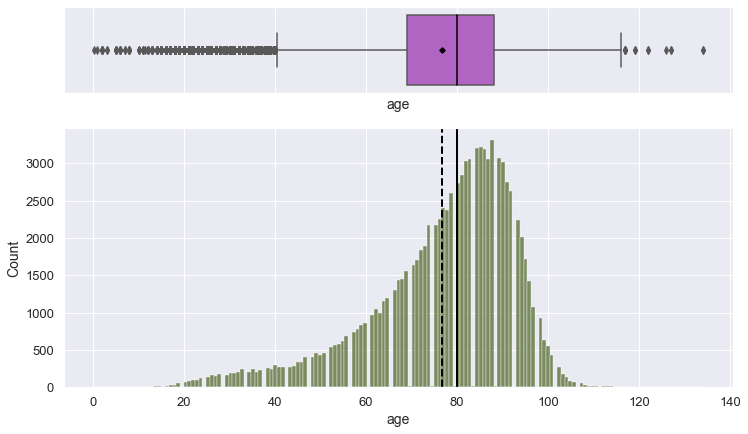

<IPython.core.display.Javascript object>

In [20]:
# Plotting histogram and boxplot of age with skewness displayed
hist_box(df, "age")
print(f'Skewness: {df["age"].skew()}')

#### Observations:
- `age` has a highly left skewed distribution with outliers at both ends, with at least one value over 130 years.
- Mean and median are ~76 and 80 respectively.
- As we are focused on pro-active lives lived, rather than passive event, records, or exceptions, we will look again at our target's distribution excluding entries that have only `event_record_other` for a category.

#### `age` without Entries with `event_record_other` as Sole Category

Skewness: -1.097491570738992


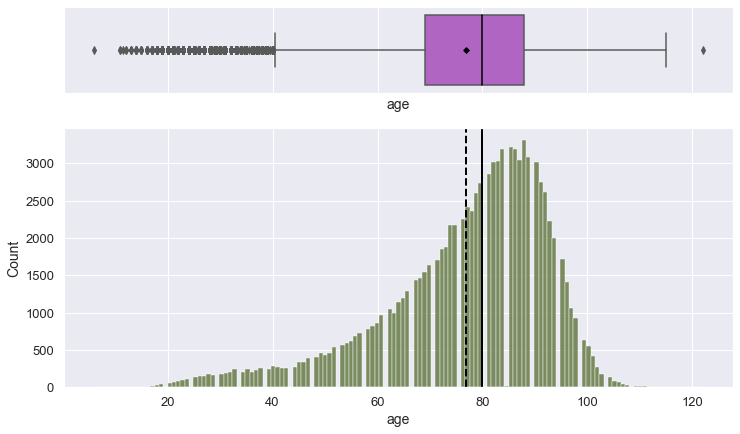

<IPython.core.display.Javascript object>

In [28]:
# Plotting histogram and boxplot of age with skewness displayed
hist_box(df[~((df["event_record_other"] == 1) & (df["num_categories"] == 1))], "age")
print(
    f'Skewness: {df[~((df["event_record_other"] == 1) & (df["num_categories"] == 1))]["age"].skew()}'
)

#### Observations:
- Mean and median are similar for the distribution excluding entries with only `event_record_other` category.
- The distribution is still highly left skewed, but slightly less and with a narrower spread, and fewer outliers.
- We will proceed to drop the entries with `event_record_other` as their sole category, before continuing in our analysis.

#### Dropping Entries with `event_record_other` as Sole Category

In [45]:
# Dropping entries with event_record_other as sole category
index = df[(df["event_record_other"] == 1) & (df["num_categories"] == 1)].index
df.drop(
    index, inplace=True,
)
df.reset_index(inplace=True, drop=True)

# Check new shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 97092 rows and 22 columns.


<IPython.core.display.Javascript object>

#### Observations:
- Our resultant dataset has 97,092 rows and 22 columns.

In [ ]:
print("dunzo!")

# Sound notification when cell executes
chime.success()

#### Observations:
- We will now save our dataset and pick back up in a new notebook.

### Exporting Dataset to SQLite Database [wp_life_expect_clean.db]()

In [ ]:
# # Exporting dataframe

# # Saving dataset in a SQLite database
# conn = sql.connect("wp_life_expect_clean.db")
# df.to_sql("wp_life_expect_clean", conn, index=False)

In [ ]:
print('Complete')

# Chime notification when cell executes
chime.success()

# [Proceed to Data Cleaning Part ]()